Milestone01_studentname.ipynb
Author: Ajai Shukla

Instructions
Assume the 591 attributes represent different sensors readings across the manufacturing process. 

Using the SECOM dataset (Links to an external site.), create a new notebook, and perform each of the following tasks and answer the related questions:

Refine your data understanding and prepare a DFD of solving the manufacturing quality problem
Read and merge data
Clean and prepare data 
Visually explore data
Handle class imbalance problem
Apply feature selection techniques to reduce dimensionality of data
What are your initial findings? Describe them in a summary section

# Refine your data understanding and prepare a DFD of solving the manufacturing quality problem

The process in the semiconductor industry is highly complicated and is normally under consistent observation via the monitoring of the signals coming from several sensors. Thus, it is important for the organization to detect the fault in the sensor as quickly as possible. There are existing traditional statistical based techniques however modern semiconductor industries have the ability to produce more data which is beyond the capability of the traditional process.

For this article, we will be using SECOM dataset which is available here. A lot of work has already done on this dataset by different authors and there are also some articles available online. In this article, we will focus on problem definition, data understanding, and data cleaning.

This article is only the first of three parts, in this article we will discuss the business problem in hand and clean the dataset. In second part we will do feature engineering and in the last article we will build some models and evaluate them.

We will be using SECOM dataset which is available here. In this assignments, we will focus on problem definition, data understanding, and data cleaning.

Problem definition
This data which is collected by these sensors not only contains relevant information but also a lot of noise. The dataset contains readings from 591. Among the 1567 examples, there are only 104 fail cases which means that out target variable is imbalanced. We will look at the distribution of the dataset when we look at the python code.

Data Understanding and Preparation Let’s start exploring the dataset now. The first step as always is to import the required libraries.
• Objective - To predict the yield of a semiconductor manufacturing process to optimize processes and increase throughput.
• Strategy - Perform data cleaning followed by feature selection techniques to preserve only most relevant signals. Compare and choose among various classification techniques to find the classifier that has the best fault detection performance.

# Data Pre-processing:
Removing/Imputing missing values 
• Removed columns where the percentage of missing values >= 50% resulting in 562 columns.
• Removed columns with zero variance (constant values) as they don’t contribute in decision making and ended up with 446 columns.
• Imputing the columns with < 50% missing values with mean(x) +rnorm(length(missing(x)))*sd(x) to prevent inflation of significance of results.

Balancing the Class:
• The dataset suffers from Rare Event problem, where majority class (Pass) is 93.4% and minority class (Fail) occurs only 6.6% among the observations, leading to severe imbalance in prediction by the fitted models (almost all the models indicated 0% sensitivity).
• We used Synthetic Data Generation and created a balanced dataset using SMOTE by over-sampling minority class and under-sampling majority class. We did not use Random Oversampling to avoid overfitting and preserve information.

# Feature Selection, Model Assessment and Selection

Feature Selection:

• As all of the given signals (predictors) are not equally valuable, feature selection is performed to identify the most
relevant signals and eliminate noise from further data analysis.
• Principal components (PC) are created for the cleaned dataset and the first 100 PCs that explain 83% of variance in the
dataset are chosen as subsets to fit classification models.
• LASSO was used for feature selection on entire predictor space and PCA was ultimately chosen as it had better performance

Pre-processing:

• Encoding the classes: The class “- 1” of response variable is encoded as “Pass” and “1” is encoded as “Fail” 
• Merging predictors and response: The encoded response variables are merged to the dataset containing Principal Components. 
• Train-test split: The merged dataset thus generated is split into training set consisting of 80% of observations and test set with 20% of observations.

Model Assessment and Selection:
• Models are assessed based on classification performance measures namely Sensitivity, Specificity, Accuracy and Error Rate. 
• Best model will be chosen based on high Sensitivity value as well as better trade-off between Sensitivity and Specificity.

# Classification Methods Used

Logistic regression
• LDA
• kNN
• Support Vector Machines (Linear, Polynomial and Radial kernels)
• Decision Tree (Pruned, Unpruned)
• Ensemble learning (Random Forest, Bagging, Boosting

# Model Selection Strategy
• As the data consists of uneven class distribution, Sensitivity and Specificity are used as performance measures than error rate. This is because in cases where the model accuracy is near ideal, the Sensitivity (% of fail cases) could be as low as 0%. 
• The model that has good trade-off between Sensitivity and Specificity is chosen as the final model as we aim to accurately predict all failures while still minimizing the False Positives for ‘Pass’ cases.

# Conclusion
• Increase process throughput: Throughput in manufacturing is defined as the average output over a period of time. By using the selected model, products that would fall under ‘Pass’ category are identified, and manufacturing times could be prioritized, and efficient scheduling can be done to maximize throughput. 
• Predict yield: The yield/performance of a given process could be quantified by estimating the number of semiconductors that fall under ‘Pass’ and ‘Fail’ categories. High value for ‘Pass’ indicates that the process is efficient and provides high yield. kNN model being selected is known for its consistent performance, as it doesn’t make any assumptions about the data (non-parametric). Even when the dataset grows by a lot over time, kNN can be expected to predict yield accurately and consistently.

Reduced time to learn: High dimensional problems have the challenge of methods being unable to converge, thereby taking a very long time to train. Using PCA for variable reduction and normalizing the data greatly reduced the dimensionality. This highly reduced the learning time of the classification models.
 • Decrease in per unit production cost: The defective semiconductors (‘Fail’ classes) identified by the model will undergo corrective processing steps in the later stages of the manufacturing process, which allows engineers to adjust and fix them in time, thereby optimizing production and reducing costs.


# Conclusion
• Increase process throughput: Throughput in manufacturing is defined as the average output over a period of time. By using the selected model, products that would fall under ‘Pass’ category are identified, and manufacturing times could be prioritized, and efficient scheduling can be done to maximize throughput. 
• Predict yield: The yield/performance of a given process could be quantified by estimating the number of semiconductors that fall under ‘Pass’ and ‘Fail’ categories. High value for ‘Pass’ indicates that the process is efficient and provides high yield. kNN model being selected is known for its consistent performance, as it doesn’t make any assumptions about the data (non-parametric). Even when the dataset grows by a lot over time, kNN can be expected to predict yield accurately and consistently.



# Problem definition
This data which is collected by these sensors not only contains relevant information but also a lot of noise. The dataset contains readings from 591. Among the 1567 examples, there are only 104 fail cases which means that out target variable is imbalanced. We will look at the distribution of the dataset when we look at the python code.

Data Understanding and Preparation Let’s start exploring the dataset now. The first step as always is to import the required libraries.


One class SVM classification for an imbalanced data set
Date created: Oct 10, 2016
Last modified: Oct 18, 2016
Tags: one-class SVM, Random Forest variable importance, imbalanced data set, anomaly detection, feature selection, semiconductor manufacturing data
About: for an imbalanced semicondutor manufacturing dataset, find explanatory variables with predictive power and build a classifier to detect failures

The SECOM dataset in the UCI Machine Learning Repository is semicondutor manufacturing data. There are 1567 records, 590 anonymized features and 104 fails. This makes it an imbalanced with a 14:1 ratio of pass to fails. The process yield has a simple pass/fail response (encoded -1/1).

Objective
If the overall objective is to streamline the manufacturing process two things are needed: (i) a good classifier and (ii) feature selection. A streamlined feature set can not only lead to better prediction accuracy and data understanding but also optimize manufacturing resources.
For this exercise, we will look at:
the use of a one-class SVM for an imbalanced data set
reducing the number of features to improve classifier performance
Methodology
The Variable Importance is a byproduct of the random forest classifier construction. We will rank the features in order of importance and the first x ranked features will be used for the classifier. We will then use the one-class SVM (OCSVM) method to classify the data. In the OCSVM, a decision boundary is learned using only the majority class. The minority class data are outliers in this setup.
Preprocessing
The data represents measurements from a large number of processes or sensors; many of the records are missing -- 50-60% of an entire column in 4% of the cases. In addition some measurements are identical/constant and so not useful for prediction. We will remove those columns with high missing count or constant values.
For the random forest classifier, we will impute the remainaing missing values with the median for the column. For the OCSVM, we will additionally scale the data. We will use the sklearn preprocessing module for both imputing and scaling.

Import Library, Read and merge data

In [54]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report,\
roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer, matthews_corrcoef

from time import time
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

SEED = 7  # random state

Using TensorFlow backend.


In [55]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
secom = pd.read_table(url, header=None, delim_whitespace=True)

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
y = pd.read_table(url, header=None, usecols=[0], squeeze=True, delim_whitespace=True)

print ('The dataset has {} observations/rows and {} variables/columns.' \
       .format(secom.shape[0], secom.shape[1]))
print ('The ratio of majority class to minority class is {}:1.' \
      .format(int(y[y == -1].size/y[y == 1].size)))

The dataset has 1567 observations/rows and 590 variables/columns.
The ratio of majority class to minority class is 14:1.


II. Preprocessing

We process the missing values first, dropping columns which have a large number of missing values and imputing values for those that have only a few missing values. The one-class SVM exercise has a more detailed version of these steps.

In [56]:
# dropping columns which have large number of missing entries 

m = map(lambda x: sum(secom[x].isnull()), range(secom.shape[1]))
m_200thresh = filter(lambda i: (m[i] > 200), range(secom.shape[1]))
secom_drop_200thresh = secom.dropna(subset=[200], axis=1)
dropthese = [x for x in secom_drop_200thresh.columns.values if 
             secom_drop_200thresh[x].std() == 0]
secom_drop_200thresh.drop(dropthese, axis=1, inplace=True)

print ('The SECOM data set now has {} variables.'\
      .format(secom_drop_200thresh.shape[1]))

The SECOM data set now has 442 variables.


In [57]:
# imputing missing values for the random forest

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
secom_imp = pd.DataFrame(imp.fit_transform(secom_drop_200thresh))

# use Random Forest to assess variable importance

rf = RandomForestClassifier(n_estimators=100, random_state=7)
rf.fit(secom_imp, y)

# sorting features according to their rank

importance = rf.feature_importances_
ranked_indices = np.argsort(importance)[::-1]

III. SVM Classification
Preprocessing

The SVM is sensitive to feature scale so the first step is to center and normalize the data. The train and test sets are scaled separately using the mean and variance computed from the training data. This is done to estimate the ability of the model to generalize.

In [58]:
# split data into train and holdout sets
# stratify the sample used for modeling to preserve the class proportions


X_train, X_holdout, y_train, y_holdout = tts(secom_imp[ranked_indices[:40]], y, \
                                             test_size=0.2, stratify=y, random_state=5)


print ('Train data: The majority/minority class have {} and {} elements respectively.'\
      .format(y_train[y_train == -1].size, y_train[y_train == 1].size))
print ('The maj/min class ratio is: {0:2.0f}' \
      .format(round(y_train[y_train == -1].size/y_train[y_train == 1].size)))
print ('Holdout data: The majority/minority class have {} and {} elements respectively.'\
       .format(y_holdout[y_holdout == -1].size, y_holdout[y_holdout == 1].size))
print ('The maj/min class ratio for the holdout set is: {0:2.0f}' \
      .format(round(y_holdout[y_holdout == -1].size/y_holdout[y_holdout == 1].size)))

Train data: The majority/minority class have 1170 and 83 elements respectively.
The maj/min class ratio is: 14
Holdout data: The majority/minority class have 293 and 21 elements respectively.
The maj/min class ratio for the holdout set is: 14


In [59]:
# scaling the split data. The holdout data uses scaling parameters 
# computed from the training data

standard_scaler = StandardScaler()
X_train_scaled  = pd.DataFrame(standard_scaler.fit_transform(X_train), \
                              index=X_train.index)
X_holdout_scaled = pd.DataFrame(standard_scaler.transform(X_holdout))
# Note: we convert to a DataFrame because the plot functions 
# we will use need DataFrame inputs.

# Finding parameters

The usual way to select parameters is via grid-search and cross-validation (CV). The scoring is based on the accuracy. When the classes are imbalanced, the true positive of the majority class dominates. Often, there is a high cost associated with the misclassification of the minority class, and in those cases alternative scoring measures such as the F1 and $F_{\beta}$ scores or the Matthews Correlation Coefficient (which uses all four values of the confusion matrix) are used.
In CV experiments on this data, the majority class still dominates so that for the best CV F1-scores, the True Negative Rate (TNR - the rate at which the minority class is correctly classified) is zero.
Instead of automating the selection of hyperparameters, I have manually selected C and $\gamma$ values for which the precision/recall/F1 values as well as the TNR are high.

An example is shown below.


In [60]:
# oversampling

ratio = 0.5

smote = SMOTE(ratio = ratio, kind='regular')
smox, smoy = smote.fit_sample(X_train_scaled, y_train)

print ('Before resampling: \n\
The majority/minority class have {} and {} elements respectively.'\
.format(y_train[y == -1].size, y_train[y == 1].size))
print ('After oversampling at {}%: \n\
The majority/minority class have {} and {} elements respectively.'\
.format(ratio, smoy[smoy == -1].size, smoy[smoy == 1].size))

Before resampling: 
The majority/minority class have 1170 and 83 elements respectively.
After oversampling at 0.5%: 
The majority/minority class have 1170 and 585 elements respectively.


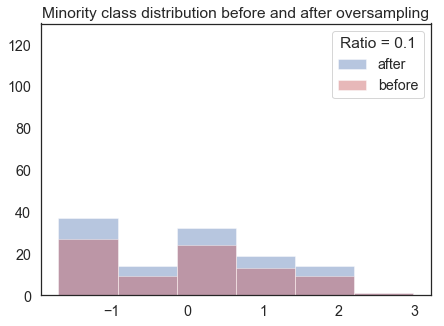

In [61]:
# plotting minority class distribution after SMOTE
# column 4 displayed

from IPython.html.widgets import interact
@interact(ratio=[0.1,1.0])

def plot_dist(ratio):
    sns.set(style="white", font_scale=1.3) 
    fig, ax = plt.subplots(figsize=(7,5))

    smote = SMOTE(ratio = ratio, kind='regular')
    smox, smoy = smote.fit_sample(X_train_scaled, y_train)
    smox_df = pd.DataFrame(smox)

    ax = sns.distplot(smox_df[4][smoy == 1], color='b',  \
                  kde=False, label='after')         
    ax = sns.distplot(X_train_scaled[4][y_train == 1], color='r', \
                  kde=False, label='before')
    ax.set_ylim([0, 130])
    ax.set(xlabel='')
    ax.legend(title='Ratio = {}'.format(ratio))
    plt.title('Minority class distribution before and after oversampling')

    plt.show()

In [67]:
# classification results
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, matthews_corrcoef,\
classification_report, roc_auc_score, accuracy_score

# manually selected parameters
clf = SVC(C = 2, gamma = .0008)
clf.fit(smox, smoy)
y_predicted = clf.predict(X_holdout_scaled)


print ('The accuracy is: {0:4.2} \n' \
.format(accuracy_score(y_holdout, y_predicted)))

print ('The confusion matrix: ')
cm = confusion_matrix(y_holdout, y_predicted)
print (cm)

print ('\nThe True Negative rate is: {0:4.2}' \
.format(float(cm[1][1])/np.sum(cm[1])))

print ('\nThe Matthews correlation coefficient: {0:4.2f} \n' \
.format(matthews_corrcoef(y_holdout, y_predicted)))

print(classification_report(y_holdout, y_predicted))
print ('The AUC is: {0:4.2}'\
.format(roc_auc_score(y_holdout, y_predicted)))

The accuracy is: 0.82 

The confusion matrix: 
[[243  50]
 [  8  13]]

The True Negative rate is: 0.62

The Matthews correlation coefficient: 0.28 

              precision    recall  f1-score   support

          -1       0.97      0.83      0.89       293
           1       0.21      0.62      0.31        21

    accuracy                           0.82       314
   macro avg       0.59      0.72      0.60       314
weighted avg       0.92      0.82      0.85       314

The AUC is: 0.72
